In [4]:
!pip install ultralytics --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os, glob
import pandas as pd
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
DEVICE = 0 if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

Using device: 0


In [ ]:
# 3️⃣ Load YOLOv11 Model
# ===============================
model = YOLO('yolo11m.pt')

In [ ]:
# ==== Augmentation hyperparameters ====
aug_hyp = {
    'hsv_h': 0.015,
    'hsv_s': 0.4,
    'hsv_v': 0.3,
    'degrees': 2.0,
    'translate': 0.05,
    'scale': 0.1,
    'shear': 1.0,
    'flipud': 0.0,
    'fliplr': 0.3,
    'mosaic': 0.5,
    'mixup': 0.1,
    'copy_paste': 0.05
}

In [ ]:
results = model.train(
    data="/content/drive/MyDrive/Final_Defence111/data/dataset.yaml",  # dataset path
    epochs=100,
    imgsz=640,
    batch=16,
    workers=4,
    device=DEVICE,
    project="/content/drive/MyDrive/Final_Defence111/yolov11_balanced_aug",
    name="train_balanced_results",
    exist_ok=True,
    **aug_hyp
)

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.05, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Final_Defence/data/dataset.yaml, degrees=2.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.3, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.4, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=train_balanced_results, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 1.2±0.2 MB/s, size: 783.9 KB)


train: Scanning /content/drive/MyDrive/Final_Defence/data/labels/train.cache... 1095 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1095/1095 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 1.1±0.5 MB/s, size: 867.0 KB)


val: Scanning /content/drive/MyDrive/Final_Defence/data/labels/val.cache... 273 images, 0 backgrounds, 0 corrupt: 100%|██████████| 273/273 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Final_Defence/yolov11_balanced_aug/train_balanced_results/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Final_Defence/yolov11_balanced_aug/train_balanced_results
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.98G      1.908      2.887      1.691         16        640: 100%|██████████| 69/69 [12:39<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.359      0.712      0.406      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.21G      1.897      1.939      1.615          9        640: 100%|██████████| 69/69 [01:40<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597     0.0362      0.266     0.0211    0.00799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.25G      1.903      1.824      1.604         13        640: 100%|██████████| 69/69 [01:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.57s/it]

                   all        273        597      0.174      0.144      0.141     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.25G      1.883      1.713      1.593         19        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:16<00:00,  1.79s/it]

                   all        273        597      0.451       0.39      0.379      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.19G      1.785      1.608      1.507         16        640: 100%|██████████| 69/69 [01:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.124     0.0743     0.0422     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.24G      1.772      1.551      1.494          9        640: 100%|██████████| 69/69 [01:34<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597      0.683      0.659      0.676      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.26G      1.699      1.496      1.456         19        640: 100%|██████████| 69/69 [01:36<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597      0.736      0.696      0.739      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.25G      1.675      1.393       1.44         18        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.748      0.662      0.718      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.19G      1.656      1.373      1.437         15        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]

                   all        273        597      0.721      0.596      0.682      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.26G      1.619      1.359      1.396         17        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.62s/it]

                   all        273        597      0.813      0.595      0.693      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.24G      1.577      1.278      1.383         24        640: 100%|██████████| 69/69 [01:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.60s/it]

                   all        273        597      0.688      0.553      0.606      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.25G      1.609      1.345      1.386         20        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.731      0.691      0.768      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.19G      1.599      1.275      1.386         24        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597      0.734      0.702      0.768      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.24G      1.518      1.226      1.343         11        640: 100%|██████████| 69/69 [01:34<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:15<00:00,  1.76s/it]

                   all        273        597      0.721      0.738      0.789      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.25G      1.517      1.194       1.34         19        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.788      0.692      0.764      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.26G       1.49      1.171      1.324         20        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]

                   all        273        597      0.717      0.614      0.743       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.19G      1.465       1.14      1.302         14        640: 100%|██████████| 69/69 [01:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.66s/it]

                   all        273        597      0.726      0.747      0.806      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.25G      1.454      1.113      1.302         11        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.798      0.737      0.807      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.26G      1.465      1.106      1.299         22        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.823      0.757      0.827      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.26G      1.431       1.09      1.288         18        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]

                   all        273        597      0.821      0.759      0.824      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.19G      1.423      1.083      1.281         16        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597       0.77      0.779       0.83      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.25G      1.409      1.074      1.274         20        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597      0.805      0.778       0.83      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.26G      1.444      1.063      1.302         11        640: 100%|██████████| 69/69 [01:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]

                   all        273        597      0.716      0.811      0.832      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.27G        1.4      1.014      1.271         27        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.60s/it]

                   all        273        597      0.791      0.787      0.831       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.19G      1.399       1.03       1.26         29        640: 100%|██████████| 69/69 [01:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.844      0.747      0.825       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.26G      1.398      1.023      1.268         15        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]

                   all        273        597      0.844      0.769      0.842      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.26G      1.337      1.001      1.239         16        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]

                   all        273        597      0.857      0.746      0.834      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.25G      1.315     0.9598      1.231         11        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.58s/it]

                   all        273        597      0.857      0.788      0.851      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.18G      1.307     0.9226      1.225         22        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]

                   all        273        597      0.823      0.794      0.835      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.26G      1.321     0.9257      1.217         21        640: 100%|██████████| 69/69 [01:32<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.809      0.774      0.843      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.24G      1.305     0.9388       1.22         25        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.829      0.768      0.845      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.26G      1.308     0.9223      1.215         26        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.849      0.792      0.842      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.19G      1.279     0.8973      1.202         16        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.811      0.781      0.846      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.25G      1.254     0.8892      1.201         11        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]

                   all        273        597      0.827      0.819      0.856      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.24G       1.25     0.8677      1.188          7        640: 100%|██████████| 69/69 [01:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.803      0.804      0.853      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.25G      1.256     0.8669      1.191         25        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]

                   all        273        597      0.809      0.805      0.853      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.18G      1.273     0.8671      1.192         13        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]

                   all        273        597      0.836      0.793      0.851      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.26G      1.221     0.8359      1.169         15        640: 100%|██████████| 69/69 [01:34<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.821      0.822      0.858      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.26G      1.221     0.8225      1.167         17        640: 100%|██████████| 69/69 [01:34<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.846      0.807      0.861      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.25G      1.214     0.8417      1.173         17        640: 100%|██████████| 69/69 [01:34<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.38s/it]

                   all        273        597      0.831      0.819      0.848      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.19G      1.211     0.8308      1.173         23        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]

                   all        273        597      0.817      0.817      0.855      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.25G      1.192     0.8024      1.164         15        640: 100%|██████████| 69/69 [01:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597      0.806      0.847      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.26G      1.157     0.7778      1.139         11        640: 100%|██████████| 69/69 [01:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]

                   all        273        597      0.837      0.822      0.869      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.28G      1.175     0.7721      1.156         13        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597       0.86      0.802      0.868      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.19G      1.181     0.7869      1.153         20        640: 100%|██████████| 69/69 [01:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597       0.82      0.824      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.26G      1.161     0.7956      1.144         13        640: 100%|██████████| 69/69 [01:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.791      0.816      0.855      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.26G      1.142     0.7648      1.132         13        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.818      0.812      0.869      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.26G      1.142     0.7662      1.134         15        640: 100%|██████████| 69/69 [01:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.841       0.82      0.872       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.19G      1.121     0.7454      1.121         23        640: 100%|██████████| 69/69 [01:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.865      0.809      0.869      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.25G      1.102     0.7204      1.109         10        640: 100%|██████████| 69/69 [01:34<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.842       0.83      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.25G      1.091     0.7094      1.105         17        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.869      0.819      0.874      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.25G      1.087     0.7071      1.096         15        640: 100%|██████████| 69/69 [01:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.847       0.82      0.862      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.19G      1.097     0.7164      1.109         15        640: 100%|██████████| 69/69 [01:34<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597      0.851      0.831      0.879      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.26G      1.105     0.7231      1.111         18        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]

                   all        273        597      0.851      0.831      0.868      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.26G      1.082      0.707      1.105         15        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:16<00:00,  1.83s/it]

                   all        273        597      0.865      0.803      0.864      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.24G      1.061     0.6843      1.081         22        640: 100%|██████████| 69/69 [01:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.845      0.815      0.874      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.19G      1.074     0.6994      1.097         12        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]

                   all        273        597      0.855      0.811      0.863       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.26G      1.083     0.6845      1.101         25        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]

                   all        273        597      0.852      0.821      0.866      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.25G      1.036     0.6708      1.077         12        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]

                   all        273        597      0.833      0.848      0.871      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.27G       1.03     0.6627      1.077         14        640: 100%|██████████| 69/69 [01:38<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]

                   all        273        597      0.875       0.82      0.867       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.18G     0.9943     0.6431      1.061         13        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597       0.84      0.835      0.875      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.24G      1.005     0.6369      1.067         12        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.59s/it]

                   all        273        597      0.881      0.821      0.876      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.28G     0.9964     0.6428      1.056         10        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.848      0.842      0.872      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.26G      1.004     0.6426      1.065         16        640: 100%|██████████| 69/69 [01:34<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597       0.83      0.846      0.882      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.19G     0.9968     0.6291      1.058         30        640: 100%|██████████| 69/69 [01:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597      0.857      0.839      0.879      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.26G     0.9802     0.6334      1.048         13        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.57s/it]

                   all        273        597      0.854       0.84      0.872      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.24G      0.953      0.606      1.046         23        640: 100%|██████████| 69/69 [01:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597      0.851      0.862      0.881      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.26G     0.9572     0.6233      1.047         11        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.853      0.834      0.877      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.19G     0.9572     0.6136      1.047         16        640: 100%|██████████| 69/69 [01:34<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.822      0.835      0.872      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.24G     0.9509     0.6079      1.043         23        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597      0.883      0.822       0.87       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.25G      0.941     0.6017      1.036         17        640: 100%|██████████| 69/69 [01:31<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.58s/it]

                   all        273        597      0.847      0.847      0.873      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.25G     0.9114     0.5649      1.025         15        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.884        0.8      0.869      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.19G     0.9147      0.588      1.021         17        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597      0.892      0.821      0.874      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.26G     0.8987     0.5719      1.016         12        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.55s/it]

                   all        273        597      0.861      0.843      0.871      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.25G     0.9175     0.5628       1.03         25        640: 100%|██████████| 69/69 [01:32<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]

                   all        273        597      0.856      0.845      0.871      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.25G     0.9137     0.5718      1.022         21        640: 100%|██████████| 69/69 [01:32<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]

                   all        273        597       0.87      0.819      0.864      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.19G     0.8815     0.5599       1.01         24        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]

                   all        273        597      0.915      0.806      0.876      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.26G     0.8776     0.5498      1.014         19        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.54s/it]

                   all        273        597      0.858      0.837      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.24G     0.8755     0.5488      1.011         11        640: 100%|██████████| 69/69 [01:34<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.875      0.827      0.875      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.25G     0.8918     0.5665      1.018         15        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.57s/it]

                   all        273        597      0.832      0.843       0.87      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.19G     0.8718     0.5425      1.007         14        640: 100%|██████████| 69/69 [01:35<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]

                   all        273        597       0.89      0.816      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.26G     0.8407     0.5267      0.988         26        640: 100%|██████████| 69/69 [01:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.65s/it]

                   all        273        597      0.879      0.827      0.873      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.27G     0.8324     0.5263     0.9847         13        640: 100%|██████████| 69/69 [01:30<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]

                   all        273        597      0.889       0.83      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.25G     0.8235     0.5095     0.9843         17        640: 100%|██████████| 69/69 [01:34<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.864      0.838      0.876      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.19G     0.8201     0.5196     0.9833         13        640: 100%|██████████| 69/69 [01:31<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.895      0.831      0.878        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.26G     0.7974     0.4962     0.9697         19        640: 100%|██████████| 69/69 [01:33<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]

                   all        273        597      0.867      0.839      0.873      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.27G     0.8208     0.5186     0.9831         23        640: 100%|██████████| 69/69 [01:36<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.57s/it]

                   all        273        597       0.87      0.834      0.878      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.25G     0.7885     0.5016     0.9656         16        640: 100%|██████████| 69/69 [01:34<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]

                   all        273        597       0.85      0.842      0.878      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.21G     0.7987     0.5004     0.9766         17        640: 100%|██████████| 69/69 [01:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:15<00:00,  1.70s/it]

                   all        273        597      0.868      0.829      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.26G     0.7993     0.4997     0.9765         22        640: 100%|██████████| 69/69 [01:30<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]

                   all        273        597      0.881      0.834      0.876      0.601


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.25G     0.6618     0.3667     0.8928         14        640: 100%|██████████| 69/69 [01:33<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.893      0.822      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.26G      0.645     0.3556     0.8924         14        640: 100%|██████████| 69/69 [01:29<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]

                   all        273        597      0.872       0.84      0.874      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.19G     0.6405     0.3535      0.891         14        640: 100%|██████████| 69/69 [01:30<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]

                   all        273        597      0.862      0.848      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.26G     0.6212     0.3467     0.8829         20        640: 100%|██████████| 69/69 [01:26<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.881      0.838      0.876      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.25G     0.6261     0.3458     0.8849         12        640: 100%|██████████| 69/69 [01:29<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.855      0.859      0.877      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.25G     0.6176     0.3417     0.8862         10        640: 100%|██████████| 69/69 [01:29<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.863      0.852       0.88      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.19G     0.6044     0.3357     0.8811         19        640: 100%|██████████| 69/69 [01:28<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]

                   all        273        597      0.866      0.854      0.881      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.26G      0.595      0.331     0.8738         10        640: 100%|██████████| 69/69 [01:28<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]

                   all        273        597      0.871      0.845      0.876      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.26G     0.5975     0.3359     0.8734         12        640: 100%|██████████| 69/69 [01:30<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]

                   all        273        597      0.859      0.859      0.877      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.26G     0.5886     0.3302     0.8701         15        640: 100%|██████████| 69/69 [01:25<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]

                   all        273        597      0.884      0.838      0.877      0.615



100 epochs completed in 3.240 hours.
Optimizer stripped from /content/drive/MyDrive/Final_Defence/yolov11_balanced_aug/train_balanced_results/weights/last.pt, 40.5MB
Optimizer stripped from /content/drive/MyDrive/Final_Defence/yolov11_balanced_aug/train_balanced_results/weights/best.pt, 40.5MB

Validating /content/drive/MyDrive/Final_Defence/yolov11_balanced_aug/train_balanced_results/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:20<00:00,  2.26s/it]


                   all        273        597      0.871      0.845      0.876      0.617
               Blastic         85        109      0.963      0.962      0.984        0.7
                 Lytic        117        413       0.68      0.586      0.651      0.317
                Normal         75         75      0.971      0.987      0.992      0.834
Speed: 0.2ms preprocess, 10.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /content/drive/MyDrive/Final_Defence/yolov11_balanced_aug/train_balanced_results


In [ ]:
from ultralytics import YOLO
import os

# -----------------------------
# Paths
# -----------------------------
MODEL_PATH = '/content/drive/MyDrive/Final_Defence111/yolov11_aug/train_aug_results/weights/best.pt'
DATA_YAML  = '/content/drive/MyDrive/Final_Defence111/data/dataset.yaml'
RESULT_DIR = '/content/drive/MyDrive/Final_Defence111/yolov11_aug'

os.makedirs(RESULT_DIR, exist_ok=True)

# -----------------------------
# Load trained YOLO model
# -----------------------------
model = YOLO(MODEL_PATH)

# -----------------------------
# Test set evaluation with custom save path
# -----------------------------
results = model.val(
    data=DATA_YAML,
    split='val',
    save=True,        # save prediction images
    save_txt=True,    # save predicted bounding boxes
    save_conf=True,   # save confidence scores
    project=RESULT_DIR,  # custom folder
    name='test_results'  # subfolder inside RESULT_DIR
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.8±1.0 ms, read: 46.7±102.8 MB/s, size: 749.9 KB)
val: Scanning /content/drive/MyDrive/Final_Defence/data/labels/val.cache... 205 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 205/205 301.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.5it/s 26.7s
                   all        205        378      0.876      0.849      0.907      0.633
               Blastic         64         86      0.912      0.942      0.977      0.692
                 Lytic         75        224      0.785      0.616      0.752      0.411
                Normal         68         68      0.931       0.99      0.993      0.796
Speed: 0.5ms preprocess, 22.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/

In [6]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 31.3 MB/s eta 0:00:00


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Universe of discourse: [0,1] রেঞ্জে probability input নেব
u = np.linspace(0, 1, 101)

# তিনটা input (Antecedent) → probability Normal, Lytic, Blastic
pN = ctrl.Antecedent(u, 'pNormal')
pL = ctrl.Antecedent(u, 'pLytic')
pB = ctrl.Antecedent(u, 'pBlastic')
final = ctrl.Consequent(u, 'final')

# ---------------------------------------------------
# Membership functions define করা
# প্রত্যেক input এর জন্য তিনটা fuzzy set: low, medium, high
# ---------------------------------------------------
for a in [pN, pL, pB]:
    a['low']  = fuzz.trimf(u, [0, 0, 0.4])  # low মানে probability ছোট
    a['med']  = fuzz.trimf(u, [0.2, 0.5, 0.8]) # med মানে মাঝামাঝি
    a['high'] = fuzz.trimf(u, [0.6, 1.0, 1.0]) # high মানে probability বড়

final['Normal']  = fuzz.trimf(u, [0.0, 0.0, 0.33]) # 0–0.33 → Normal
final['Lytic']   = fuzz.trimf(u, [0.33, 0.5, 0.66]) # 0.33–0.66 → Lytic
final['Blastic'] = fuzz.trimf(u, [0.66, 1.0, 1.0]) # 0.66–1 → Blastic

# Rules
rules = [
    # যদি pL high হয় আর pB high না হয় → Lytic
    ctrl.Rule(pL['high'] & ~pB['high'], final['Lytic']),
    # যদি pB high হয় আর pL high না হয় → Blastic
    ctrl.Rule(pB['high'] & ~pL['high'], final['Blastic']),
    # যদি pN high হয় আর অন্য দুইটা low হয় → Normal
    ctrl.Rule(pN['high'] & pL['low'] & pB['low'], final['Normal']),

    # Conflict handler: pL এবং pB দুটোই medium হলে → Lytic
    ctrl.Rule(pL['med'] & pB['med'], final['Lytic']),   # প্রয়োজনে বদলাবে
    # Low–low pL, pB কিন্তু Normal medium হলে → Normal
    ctrl.Rule(pL['low'] & pB['low'] & pN['med'], final['Normal'])
]

# Fuzzy Inference System তৈরি

fis = ctrl.ControlSystem(rules)
fuzzy_decider = ctrl.ControlSystemSimulation(fis)

# Decision function

def decide_with_fuzzy(pN_, pL_, pB_, tie_break=None):
    fuzzy_decider.input['pNormal'] = pN_
    fuzzy_decider.input['pLytic']  = pL_
    fuzzy_decider.input['pBlastic']= pB_

   # Fuzzy inference → crisp value বের করা
    fuzzy_decider.compute()
    y = fuzzy_decider.output['final']
    # ক্রিস্প ক্লাস
    if y < 0.33:
        cls = 2  # Normal
    elif y < 0.66:
        cls = 1  # Lytic
    else:
        cls = 0  # Blastic

    # টাই ব্রেক (অপশনাল): area/box-count ফিচার নাও
    if tie_break is not None and (abs(pL_-pB_)<0.05) and cls in (0,1):
        # tie_break: dict like {'lytic_area':..., 'blastic_area':..., 'lytic_n':..., 'blastic_n':...}
        if tie_break.get('blastic_area',0) > tie_break.get('lytic_area',0)*1.2:
            cls = 0
        elif tie_break.get('lytic_area',0) > tie_break.get('blastic_area',0)*1.2:
            cls = 1
        else:
            # fallback: যার box-count বেশি
            cls = 1 if tie_break.get('lytic_n',0) >= tie_break.get('blastic_n',0) else 0

    return cls, y


In [9]:
import os, glob
import numpy as np
from ultralytics import YOLO  # নিশ্চিত হও pip install ultralytics

# ----------------------
# Path setup
# ----------------------
test_dir = "/content/drive/MyDrive/Final_Defence/data/images/val"
gtdir    = "/content/drive/MyDrive/Final_Defence/data/labels/val"

# Load trained YOLOv11 model
model = YOLO("/content/drive/MyDrive/Final_Defence/yolov11/train_aug_results/weights/best.pt")

# Class labels according to YAML mapping
labels = ["Blastic", "Lytic", "Normal"]  # 0=Blastic, 1=Lytic, 2=Normal
cm = np.zeros((3,3), dtype=int)

# ----------------------
# Fuzzy Decision Function
# ----------------------
def decide_with_fuzzy(pN, pL, pB, extra):
    """
    Fuzzy rules:
        0 = Blastic
        1 = Lytic
        2 = Normal
    """
    # Simple fuzzy + threshold decision
    if pL > 0.5 or extra['lytic_area'] > 0.08 or extra['lytic_n'] > 1:
        return 1, pL
    elif pB > 0.5 or extra['blastic_area'] > 0.08 or extra['blastic_n'] > 1:
        return 0, pB
    else:
        return 2, pN  # Normal

# ----------------------
# Loop over validation images (PNG)
# ----------------------
image_files = glob.glob(os.path.join(test_dir, "*.png"))
print(f"Total images found: {len(image_files)}")  # debug

for img in image_files:
    name = os.path.splitext(os.path.basename(img))[0]

    # -------- Ground Truth class (max area box) --------
    gtf = os.path.join(gtdir, f"{name}.txt")
    gt = 0
    if os.path.exists(gtf):
        maxi, marea = 0, -1
        for line in open(gtf):
            cls, x, y, w, h = line.strip().split()
            cls = int(cls); w = float(w); h = float(h)
            area_box = w * h
            if area_box > marea:
                marea = area_box
                maxi = cls
        gt = maxi

    # -------- YOLO Prediction --------
    r = model(img)[0]
    K = 3
    agg = np.zeros(K)      # max confidence per class
    count = np.zeros(K)    # number of boxes per class
    area = np.zeros(K)     # total area per class

    H, W = r.orig_shape
    for b in r.boxes:
        c = int(b.cls.item())
        conf = float(b.conf.item())
        agg[c] = max(agg[c], conf)
        count[c] += 1
        x1, y1, x2, y2 = b.xyxy.cpu().numpy().ravel()
        area[c] += (x2-x1)*(y2-y1) / (W*H)

    # -------- Apply fuzzy decision --------
    pred_cls, _ = decide_with_fuzzy(
        pN=agg[2],  # Normal
        pL=agg[1],  # Lytic
        pB=agg[0],  # Blastic
        extra={
            'lytic_area': area[1],
            'blastic_area': area[0],
            'lytic_n': count[1],
            'blastic_n': count[0]
        }
    )

    # Update confusion matrix
    cm[gt, pred_cls] += 1

    # -------- Debug print --------
    print(f"Image: {name}, GT: {labels[gt]}, Pred: {labels[pred_cls]}, Agg: {agg}, Area: {area}, Count: {count}")

# ----------------------
# Final results
# ----------------------
print("\nConfusion Matrix:\n", cm)
acc = np.trace(cm) / cm.sum() if cm.sum() > 0 else 0.0
print("Accuracy (fuzzy):", round(acc, 4))


Total images found: 273

image 1/1 /content/drive/MyDrive/Final_Defence/data/images/val/Lytic_00017.png: 512x640 1 Lytic, 121.9ms
Speed: 15.6ms preprocess, 121.9ms inference, 359.2ms postprocess per image at shape (1, 3, 512, 640)
Image: Lytic_00017, GT: Lytic, Pred: Lytic, Agg: [          0     0.76853           0], Area: [          0   0.0085623           0], Count: [          0           1           0]

image 1/1 /content/drive/MyDrive/Final_Defence/data/images/val/Lytic_00019.png: 512x640 2 Lytics, 30.2ms
Speed: 3.2ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)
Image: Lytic_00019, GT: Lytic, Pred: Lytic, Agg: [          0      0.6762           0], Area: [          0    0.011014           0], Count: [          0           2           0]

image 1/1 /content/drive/MyDrive/Final_Defence/data/images/val/Lytic_00033.png: 576x640 3 Lytics, 92.1ms
Speed: 4.5ms preprocess, 92.1ms inference, 4.9ms postprocess per image at shape (1, 3, 576, 640)
Image: 

In [10]:
from sklearn.metrics import classification_report

y_true, y_pred = [], []
for i in range(3):
    for j in range(3):
        y_true += [i]*cm[i,j]
        y_pred += [j]*cm[i,j]

print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

     Blastic       1.00      0.90      0.95        84
       Lytic       0.93      0.94      0.93       114
      Normal       0.89      0.97      0.93        75

    accuracy                           0.94       273
   macro avg       0.94      0.94      0.94       273
weighted avg       0.94      0.94      0.94       273



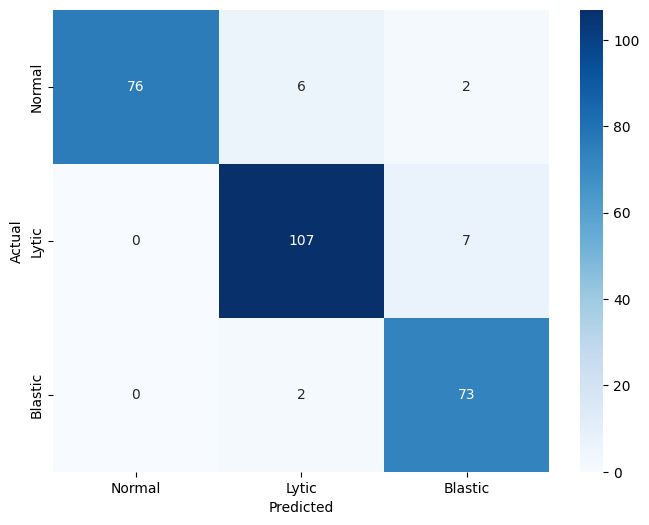

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example confusion matrix (replace with your own values)
cm = np.array([[76, 6, 2],
               [0, 107, 7],
               [0, 2, 73]])

# Class labels
labels = ["Normal", "Lytic", "Blastic"]

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()